In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-prices/carprices.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/car-prices/carprices.csv')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes
None


,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


***Plotting mileage vs sell price & Age of Cars to observe the relationship between these variable***

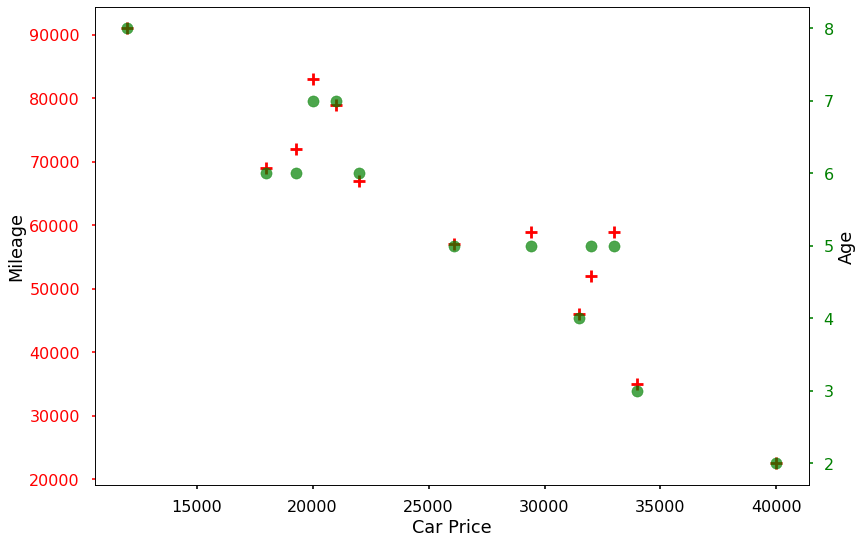

In [4]:
#plotting mileage vs sell price to observe the relationship between these variable
plt.style.use('seaborn-poster')
fig, ax = plt.subplots()
ax.scatter(df['Sell Price($)'], df['Mileage'], color='red', marker='+', label='Mileage')
ax.set_xlabel('Car Price')
ax.set_ylabel('Mileage')
ax.tick_params('y', colors='red')
# ax.legend()
ax2 = ax.twinx()
ax2.scatter(df['Sell Price($)'], df['Age(yrs)'], color='green',label='Age',alpha=0.7)
ax2.set_xlabel('Car Price')
ax2.set_ylabel('Age')
ax2.tick_params('y', colors='green')
# ax2.legend()
plt.show()

In [5]:
#Spliting the dataset into matrix of feature & dependent variable
x = df.iloc[:,[0,1,3]].values
y = df.iloc[:, 2].values
print(x)
print(y)

[['BMW X5' 69000 6]
 ['BMW X5' 35000 3]
 ['BMW X5' 57000 5]
 ['BMW X5' 22500 2]
 ['BMW X5' 46000 4]
 ['Audi A5' 59000 5]
 ['Audi A5' 52000 5]
 ['Audi A5' 72000 6]
 ['Audi A5' 91000 8]
 ['Mercedez Benz C class' 67000 6]
 ['Mercedez Benz C class' 83000 7]
 ['Mercedez Benz C class' 79000 7]
 ['Mercedez Benz C class' 59000 5]]
[18000 34000 26100 40000 31500 29400 32000 19300 12000 22000 20000 21000
 33000]


In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
x = ct.fit_transform(x)
print(x)

[[0.0 1.0 0.0 69000 6]
 [0.0 1.0 0.0 35000 3]
 [0.0 1.0 0.0 57000 5]
 [0.0 1.0 0.0 22500 2]
 [0.0 1.0 0.0 46000 4]
 [1.0 0.0 0.0 59000 5]
 [1.0 0.0 0.0 52000 5]
 [1.0 0.0 0.0 72000 6]
 [1.0 0.0 0.0 91000 8]
 [0.0 0.0 1.0 67000 6]
 [0.0 0.0 1.0 83000 7]
 [0.0 0.0 1.0 79000 7]
 [0.0 0.0 1.0 59000 5]]


**Removing one dummy variable**

In [7]:
#Removing one dummy variable column to avoid dummy variable trap
x = x[:, 1:]
x

array([[1.0, 0.0, 69000, 6],
       [1.0, 0.0, 35000, 3],
       [1.0, 0.0, 57000, 5],
       [1.0, 0.0, 22500, 2],
       [1.0, 0.0, 46000, 4],
       [0.0, 0.0, 59000, 5],
       [0.0, 0.0, 52000, 5],
       [0.0, 0.0, 72000, 6],
       [0.0, 0.0, 91000, 8],
       [0.0, 1.0, 67000, 6],
       [0.0, 1.0, 83000, 7],
       [0.0, 1.0, 79000, 7],
       [0.0, 1.0, 59000, 5]], dtype=object)

**Training our model**

In [8]:
#Training our model 
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

**Price of mercedez benz that is 4 yr old with mileage 45000  &     Price of BMW X5 that is 7 yr old with mileage 86000**

In [9]:
#Predicting results
reg.predict([[0, 1, 45000, 4], [0, 0, 86000, 7]])

array([36991.31721062, 15365.40972059])

**Model Score**

In [10]:
#Scoring our model
reg.score(x,y)

0.9417050937281083

So, our model socered 94%